In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler 

In [2]:
data = pd.read_csv(r'Base_entrenamiento.csv')
data.head()

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,7,7,2.857738,3.5,7,7.0,1.166667,7,0,2.333333,...,0.0,0,0,0,0.000000,0,2,PYME,Pyme Pequena,201608
1,17,17,7.641989,12.0,17,17.0,8.000000,17,0,13.666667,...,0.0,2,0,0,8.810053,0,5,PYME,Pyme Pequena,201611
2,27,36,12.868566,13.5,27,27.0,21.000000,27,0,14.000000,...,0.0,7,0,0,10.500000,0,9,PYME,Pyme Pequena,201705
3,27,27,10.888832,13.5,27,27.0,4.833333,27,0,9.000000,...,0.0,0,0,0,0.000000,0,12,PYME,Pyme Pequena,201609
4,32,32,11.651895,10.0,20,20.0,20.833333,20,0,17.333333,...,0.0,19,0,0,9.190000,0,15,PYME,Pyme Pequena,201702


In [3]:
data.describe()

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_productos_no_rotativos_entidad,pc_saldo_no_rot_ent,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,anhomes_ciclo
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,12.908100,16.447200,6.484026,7.653050,7.3156,7.3156,7.034238,10.878500,0.010300,7.507875,...,0.07630,1.442471e+06,1634.203000,3.309350,0.03795,0.001600,6.729243,0.692400,20054.133900,201663.59140
std,19.558647,22.596153,8.130128,15.100529,15.7581,15.7581,13.312215,18.284183,0.387042,14.320475,...,0.96334,1.697785e+07,18443.129269,5.683887,0.19108,0.159996,5.057818,0.461512,11678.100328,46.86751
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,201607.00000
25%,0.000000,3.000000,1.224745,0.000000,0.0000,0.0000,0.666667,0.000000,0.000000,0.000000,...,0.00000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9939.500000,201610.00000
50%,7.000000,11.000000,4.242641,3.000000,0.0000,0.0000,3.500000,5.000000,0.000000,3.333333,...,0.00000,0.000000e+00,0.000000,1.000000,0.00000,0.000000,8.265756,1.000000,19889.500000,201702.00000
75%,17.000000,22.000000,8.981462,9.000000,9.0000,9.0000,8.666667,14.000000,0.000000,9.000000,...,0.00000,0.000000e+00,0.000000,3.000000,0.00000,0.000000,10.518994,1.000000,30168.250000,201705.00000
max,696.000000,1062.000000,210.552052,681.500000,696.0000,696.0000,850.000000,696.000000,16.000000,667.333333,...,21.00000,3.241470e+08,348900.000000,31.000000,1.00000,16.000000,30.000000,1.000000,40453.000000,201708.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 124 entries, max_trim to anhomes_ciclo
dtypes: float64(68), int64(54), object(2)
memory usage: 18.9+ MB


In [5]:
data.groupby('y_auto_cura').count()


,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_saldo_no_rot_ent,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
y_auto_cura,,,,,,,,,,,,,,,,,,,,,
0,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,...,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152
1,13848,13848,13848,13848,13848,13848,13848,13848,13848,13848,...,13848,13848,13848,13848,13848,13848,13848,13848,13848,13848


In [6]:
print([col for col in data.columns if data[col].dtype == 'object'])


['segmentoestructural', 'subsegmentoestructural']


In [7]:
print(data['segmentoestructural'].unique())  

['PYME']


In [8]:
print(data['subsegmentoestructural'].unique())

['Pyme Pequena']


In [9]:
data = data.drop(['segmentoestructural', 'subsegmentoestructural'], axis=1)
print([col for col in data.columns if data[col].dtype == 'object'])

[]


In [10]:
int_dt_in_data = [col for col in data.columns if data[col].dtype == 'int64']
print(int_dt_in_data)

['max_trim', 'max_sem', 'max_mes_anterior', 'max_bim', 'mejor_gestion', 'nro_gestiones', 'dh_cant_entradas', 'gestiones_eficaces', 'dh_max_dia_entradas', 'dh_val_entradas', 'dh_max_dia_salidas', 'dia_pago', 'pcons_tarjeta_de_credito', 'gestiones_prod', 'pcons_vehiculos_sufi', 'cluster_recod', 'dmi_max_egreso_diario', 'dh_cant_otros_d', 'dmi_max_ingreso_diario', 'dh_val_otros_d', 'dh_cant_pagos_d', 'dmi_ingreso_total_mes', 'dh_val_pagos_d', 'dh_cant_salidas', 'dh_min_dia_pagos_d', 'dh_min_dia_pago_tarj_d', 'dmi_egreso_total_mes', 'dh_max_dia_otros_d', 'dh_cant_pago_tarj_d', 'dh_max_dia_pagos_d', 'cp_esta_cuota_otro', 'dh_max_dia_retiros_d', 'dh_val_salidas', 'dh_min_dia_tras_d', 'dh_val_retiros_d', 'marca_info_cifin_decode', 'dh_max_dia_pago_tarj_d', 'dh_min_dia_otros_d', 'dc_cant_obligaciones', 'gsm_mejor_gestion', 'dh_min_dia_nomina_c', 'dh_max_dia_nomina_c', 'dh_val_nomina_c', 'banca_completa', 'dh_min_dia_pago_cred_d', 'dh_cant_tras_d', 'dh_max_dia_comisio_d', 'dh_val_pago_tarj_d', 

array([[<AxesSubplot:title={'center':'max_trim'}>,
        <AxesSubplot:title={'center':'max_sem'}>,
        <AxesSubplot:title={'center':'max_mes_anterior'}>,
        <AxesSubplot:title={'center':'max_bim'}>,
        <AxesSubplot:title={'center':'mejor_gestion'}>,
        <AxesSubplot:title={'center':'nro_gestiones'}>,
        <AxesSubplot:title={'center':'dh_cant_entradas'}>],
       [<AxesSubplot:title={'center':'gestiones_eficaces'}>,
        <AxesSubplot:title={'center':'dh_max_dia_entradas'}>,
        <AxesSubplot:title={'center':'dh_val_entradas'}>,
        <AxesSubplot:title={'center':'dh_max_dia_salidas'}>,
        <AxesSubplot:title={'center':'dia_pago'}>,
        <AxesSubplot:title={'center':'pcons_tarjeta_de_credito'}>,
        <AxesSubplot:title={'center':'gestiones_prod'}>],
       [<AxesSubplot:title={'center':'pcons_vehiculos_sufi'}>,
        <AxesSubplot:title={'center':'cluster_recod'}>,
        <AxesSubplot:title={'center':'dmi_max_egreso_diario'}>,
        <AxesSubp

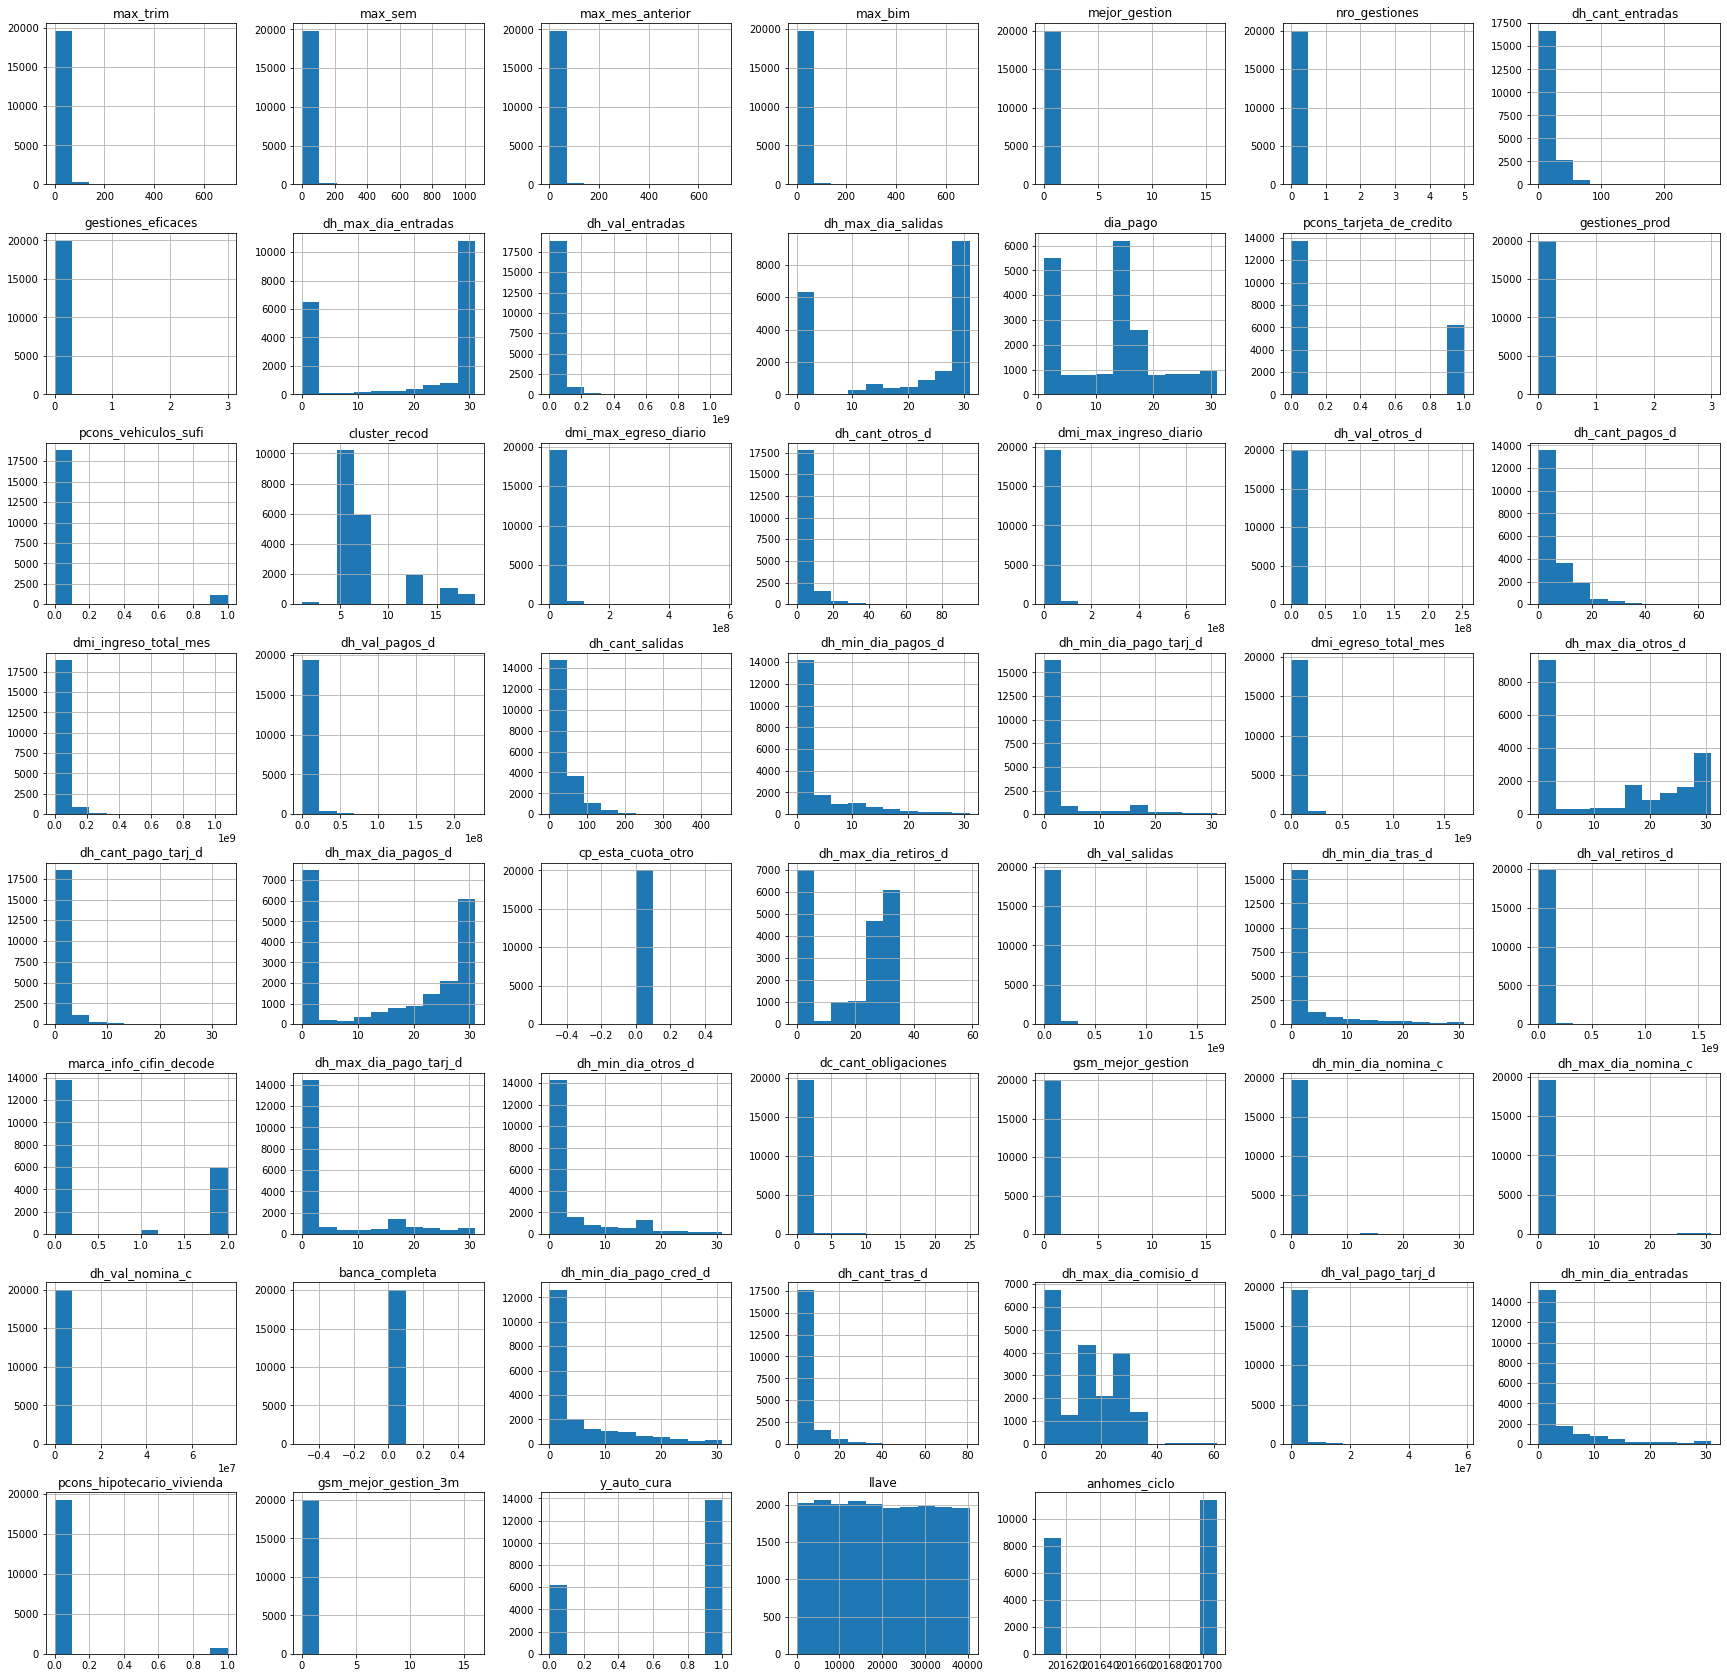

In [11]:
data[int_dt_in_data].hist(figsize=(30,30))

In [12]:
float_dt_in_data = [col for col in data.columns if data[col].dtype == 'float64']
print(int_dt_in_data)

['max_trim', 'max_sem', 'max_mes_anterior', 'max_bim', 'mejor_gestion', 'nro_gestiones', 'dh_cant_entradas', 'gestiones_eficaces', 'dh_max_dia_entradas', 'dh_val_entradas', 'dh_max_dia_salidas', 'dia_pago', 'pcons_tarjeta_de_credito', 'gestiones_prod', 'pcons_vehiculos_sufi', 'cluster_recod', 'dmi_max_egreso_diario', 'dh_cant_otros_d', 'dmi_max_ingreso_diario', 'dh_val_otros_d', 'dh_cant_pagos_d', 'dmi_ingreso_total_mes', 'dh_val_pagos_d', 'dh_cant_salidas', 'dh_min_dia_pagos_d', 'dh_min_dia_pago_tarj_d', 'dmi_egreso_total_mes', 'dh_max_dia_otros_d', 'dh_cant_pago_tarj_d', 'dh_max_dia_pagos_d', 'cp_esta_cuota_otro', 'dh_max_dia_retiros_d', 'dh_val_salidas', 'dh_min_dia_tras_d', 'dh_val_retiros_d', 'marca_info_cifin_decode', 'dh_max_dia_pago_tarj_d', 'dh_min_dia_otros_d', 'dc_cant_obligaciones', 'gsm_mejor_gestion', 'dh_min_dia_nomina_c', 'dh_max_dia_nomina_c', 'dh_val_nomina_c', 'banca_completa', 'dh_min_dia_pago_cred_d', 'dh_cant_tras_d', 'dh_max_dia_comisio_d', 'dh_val_pago_tarj_d', 

array([[<AxesSubplot:title={'center':'desv_sem'}>,
        <AxesSubplot:title={'center':'prom_bim'}>,
        <AxesSubplot:title={'center':'prom_mes_anterior'}>,
        <AxesSubplot:title={'center':'prom_sem'}>,
        <AxesSubplot:title={'center':'prom_trim'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_30_ult_12_meses'}>,
        <AxesSubplot:title={'center':'desv_trim'}>,
        <AxesSubplot:title={'center':'desv_bim'}>],
       [<AxesSubplot:title={'center':'pc_cant_moras_30_ult_3_meses'}>,
        <AxesSubplot:title={'center':'pc_tiem_1er_prod_abierto_total'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_60_ult_12_meses'}>,
        <AxesSubplot:title={'center':'pc_transaccional'}>,
        <AxesSubplot:title={'center':'pc_cupo_entidad'}>,
        <AxesSubplot:title={'center':'pc_cuotas_como_ppal'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_90_ult_12_meses'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_60_ult_3_meses'}>],
       [<AxesSubplot

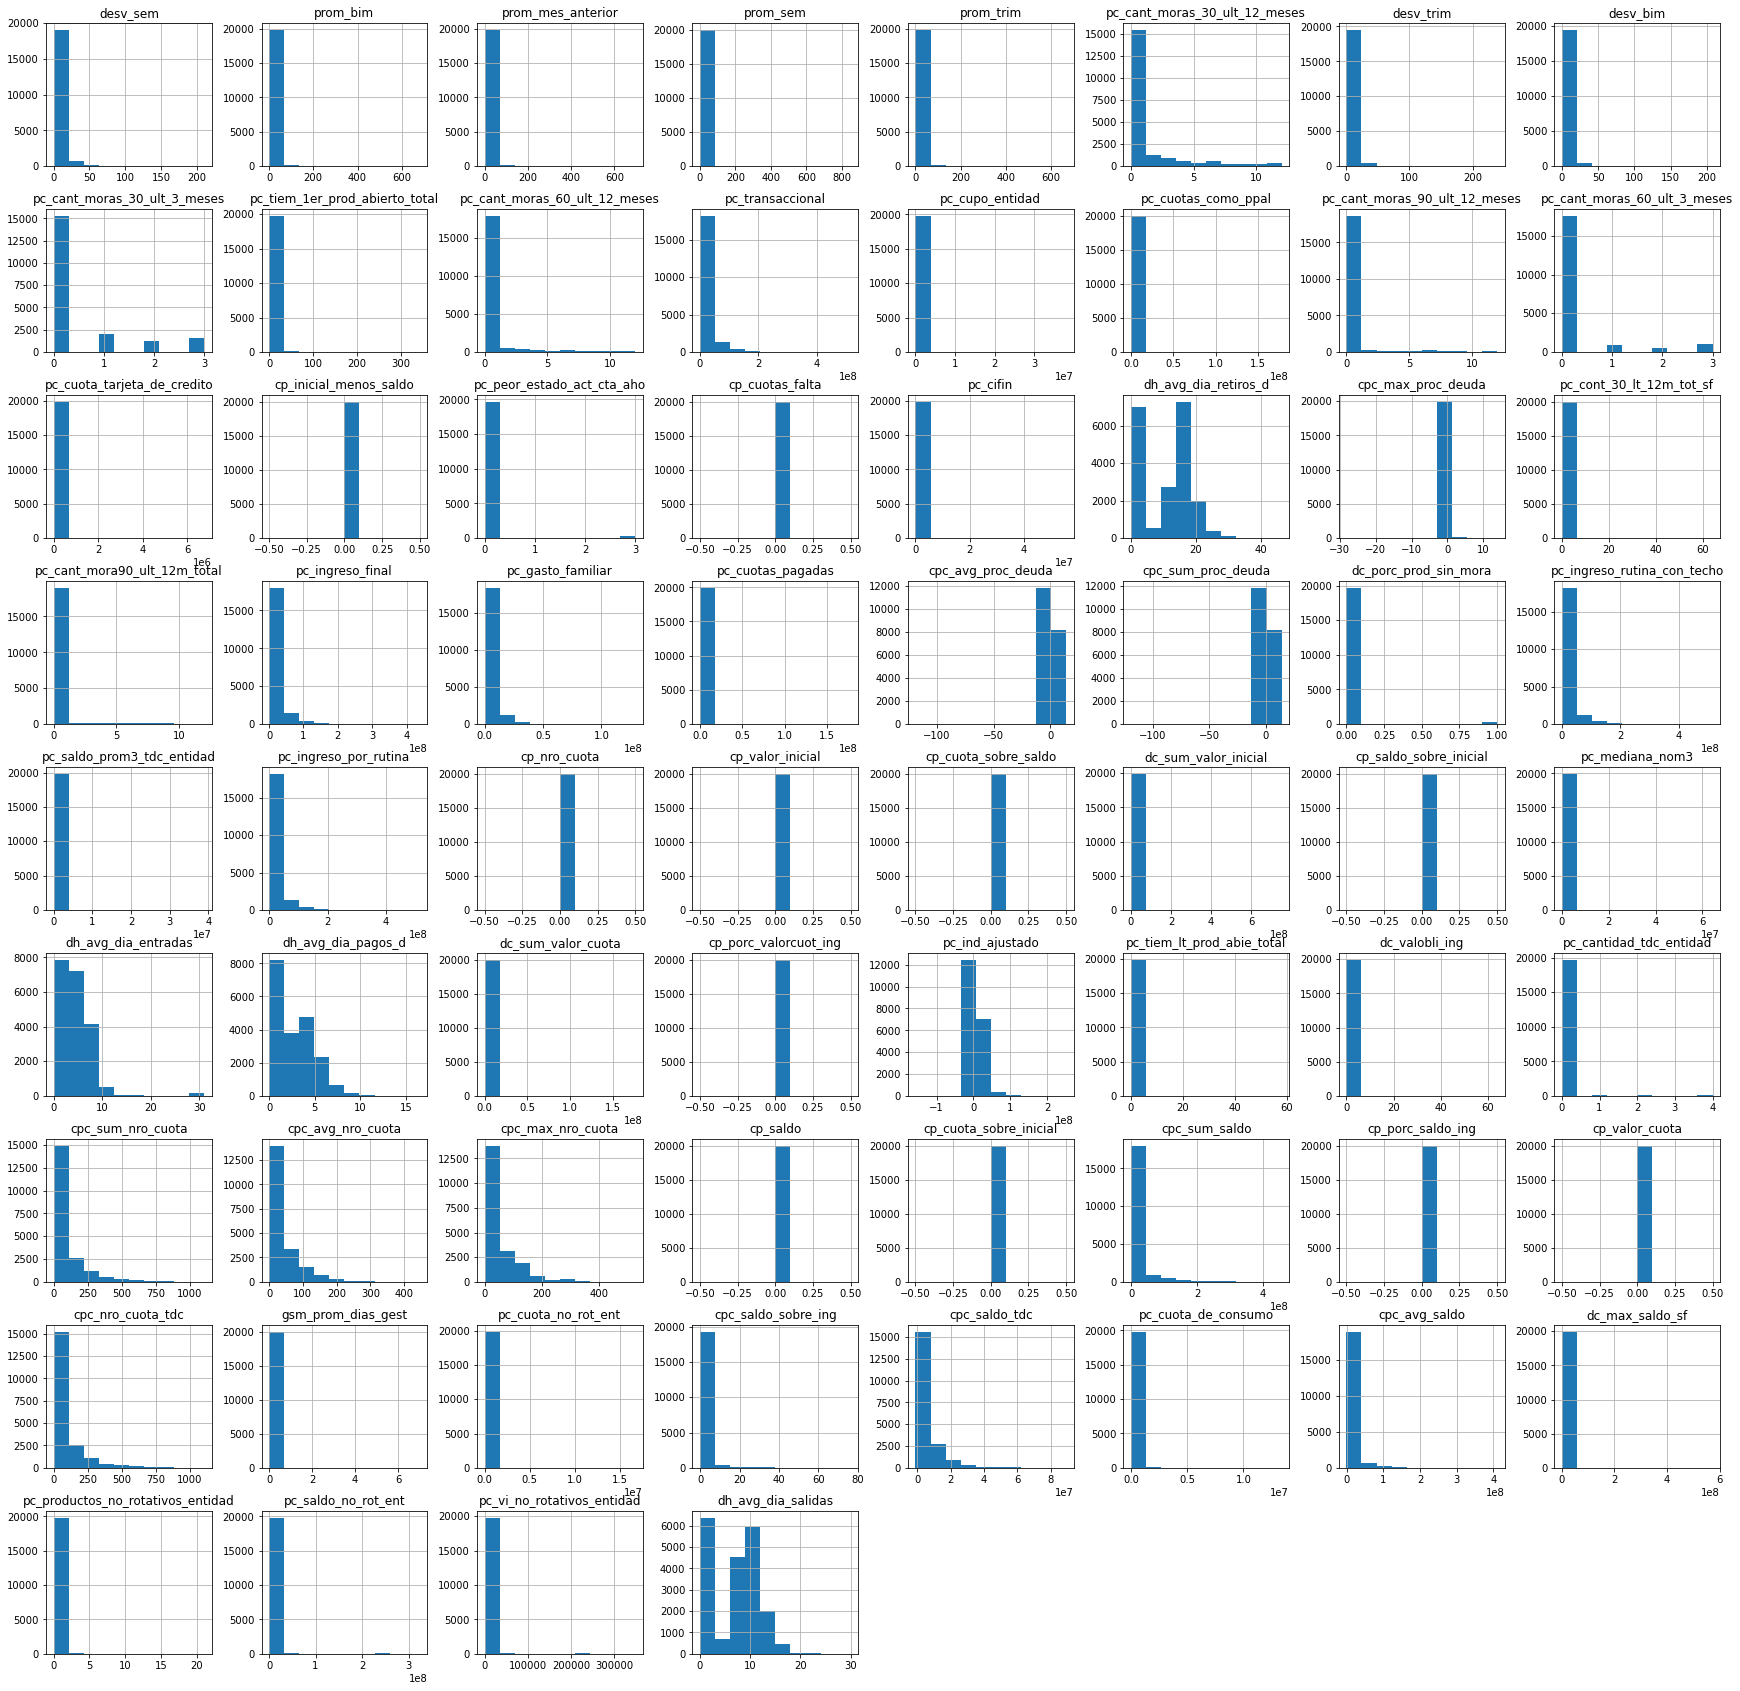

In [13]:
data[float_dt_in_data].hist(figsize=(30,30))

In [14]:
scaler = StandardScaler().fit(data[float_dt_in_data])
data[float_dt_in_data] = scaler.fit_transform(data[float_dt_in_data])
data.describe()

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_productos_no_rotativos_entidad,pc_saldo_no_rot_ent,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,anhomes_ciclo
count,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.0000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.00000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.00000
mean,12.908100,16.447200,-6.186034e-16,3.386846e-16,7.3156,1.788292e-16,-6.088186e-17,10.878500,0.010300,-1.694200e-16,...,7.044829e-15,-1.023470e-14,-1.198539e-14,3.309350,0.03795,0.001600,3.169576e-16,0.692400,20054.133900,201663.59140
std,19.558647,22.596153,1.000025e+00,1.000025e+00,15.7581,1.000025e+00,1.000025e+00,18.284183,0.387042,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,5.683887,0.19108,0.159996,1.000025e+00,0.461512,11678.100328,46.86751
min,0.000000,0.000000,-7.975505e-01,-5.068194e-01,0.0000,-4.642554e-01,-5.284180e-01,0.000000,0.000000,-5.242887e-01,...,-7.920555e-02,-8.496408e-02,-8.860990e-02,0.000000,0.00000,0.000000,-1.330497e+00,0.000000,2.000000,201607.00000
25%,0.000000,3.000000,-6.469040e-01,-5.068194e-01,0.0000,-4.642554e-01,-4.783374e-01,0.000000,0.000000,-5.242887e-01,...,-7.920555e-02,-8.496408e-02,-8.860990e-02,0.000000,0.00000,0.000000,-1.330497e+00,0.000000,9939.500000,201610.00000
50%,7.000000,11.000000,-2.756957e-01,-3.081459e-01,0.0000,-4.642554e-01,-2.654950e-01,5.000000,0.000000,-2.915159e-01,...,-7.920555e-02,-8.496408e-02,-8.860990e-02,1.000000,0.00000,0.000000,3.037973e-01,1.000000,19889.500000,201702.00000
75%,17.000000,22.000000,3.071906e-01,8.920109e-02,9.0000,1.068937e-01,1.226294e-01,14.000000,0.000000,1.041978e-01,...,-7.920555e-02,-8.496408e-02,-8.860990e-02,3.000000,0.00000,0.000000,7.493045e-01,1.000000,30168.250000,201705.00000
max,696.000000,1062.000000,2.510085e+01,4.462518e+01,696.0000,4.370461e+01,6.332431e+01,696.000000,16.000000,4.607682e+01,...,2.172049e+01,1.900786e+01,1.882948e+01,31.000000,1.00000,16.000000,4.601063e+00,1.000000,40453.000000,201708.00000


array([[<AxesSubplot:title={'center':'desv_sem'}>,
        <AxesSubplot:title={'center':'prom_bim'}>,
        <AxesSubplot:title={'center':'prom_mes_anterior'}>,
        <AxesSubplot:title={'center':'prom_sem'}>,
        <AxesSubplot:title={'center':'prom_trim'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_30_ult_12_meses'}>,
        <AxesSubplot:title={'center':'desv_trim'}>,
        <AxesSubplot:title={'center':'desv_bim'}>],
       [<AxesSubplot:title={'center':'pc_cant_moras_30_ult_3_meses'}>,
        <AxesSubplot:title={'center':'pc_tiem_1er_prod_abierto_total'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_60_ult_12_meses'}>,
        <AxesSubplot:title={'center':'pc_transaccional'}>,
        <AxesSubplot:title={'center':'pc_cupo_entidad'}>,
        <AxesSubplot:title={'center':'pc_cuotas_como_ppal'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_90_ult_12_meses'}>,
        <AxesSubplot:title={'center':'pc_cant_moras_60_ult_3_meses'}>],
       [<AxesSubplot

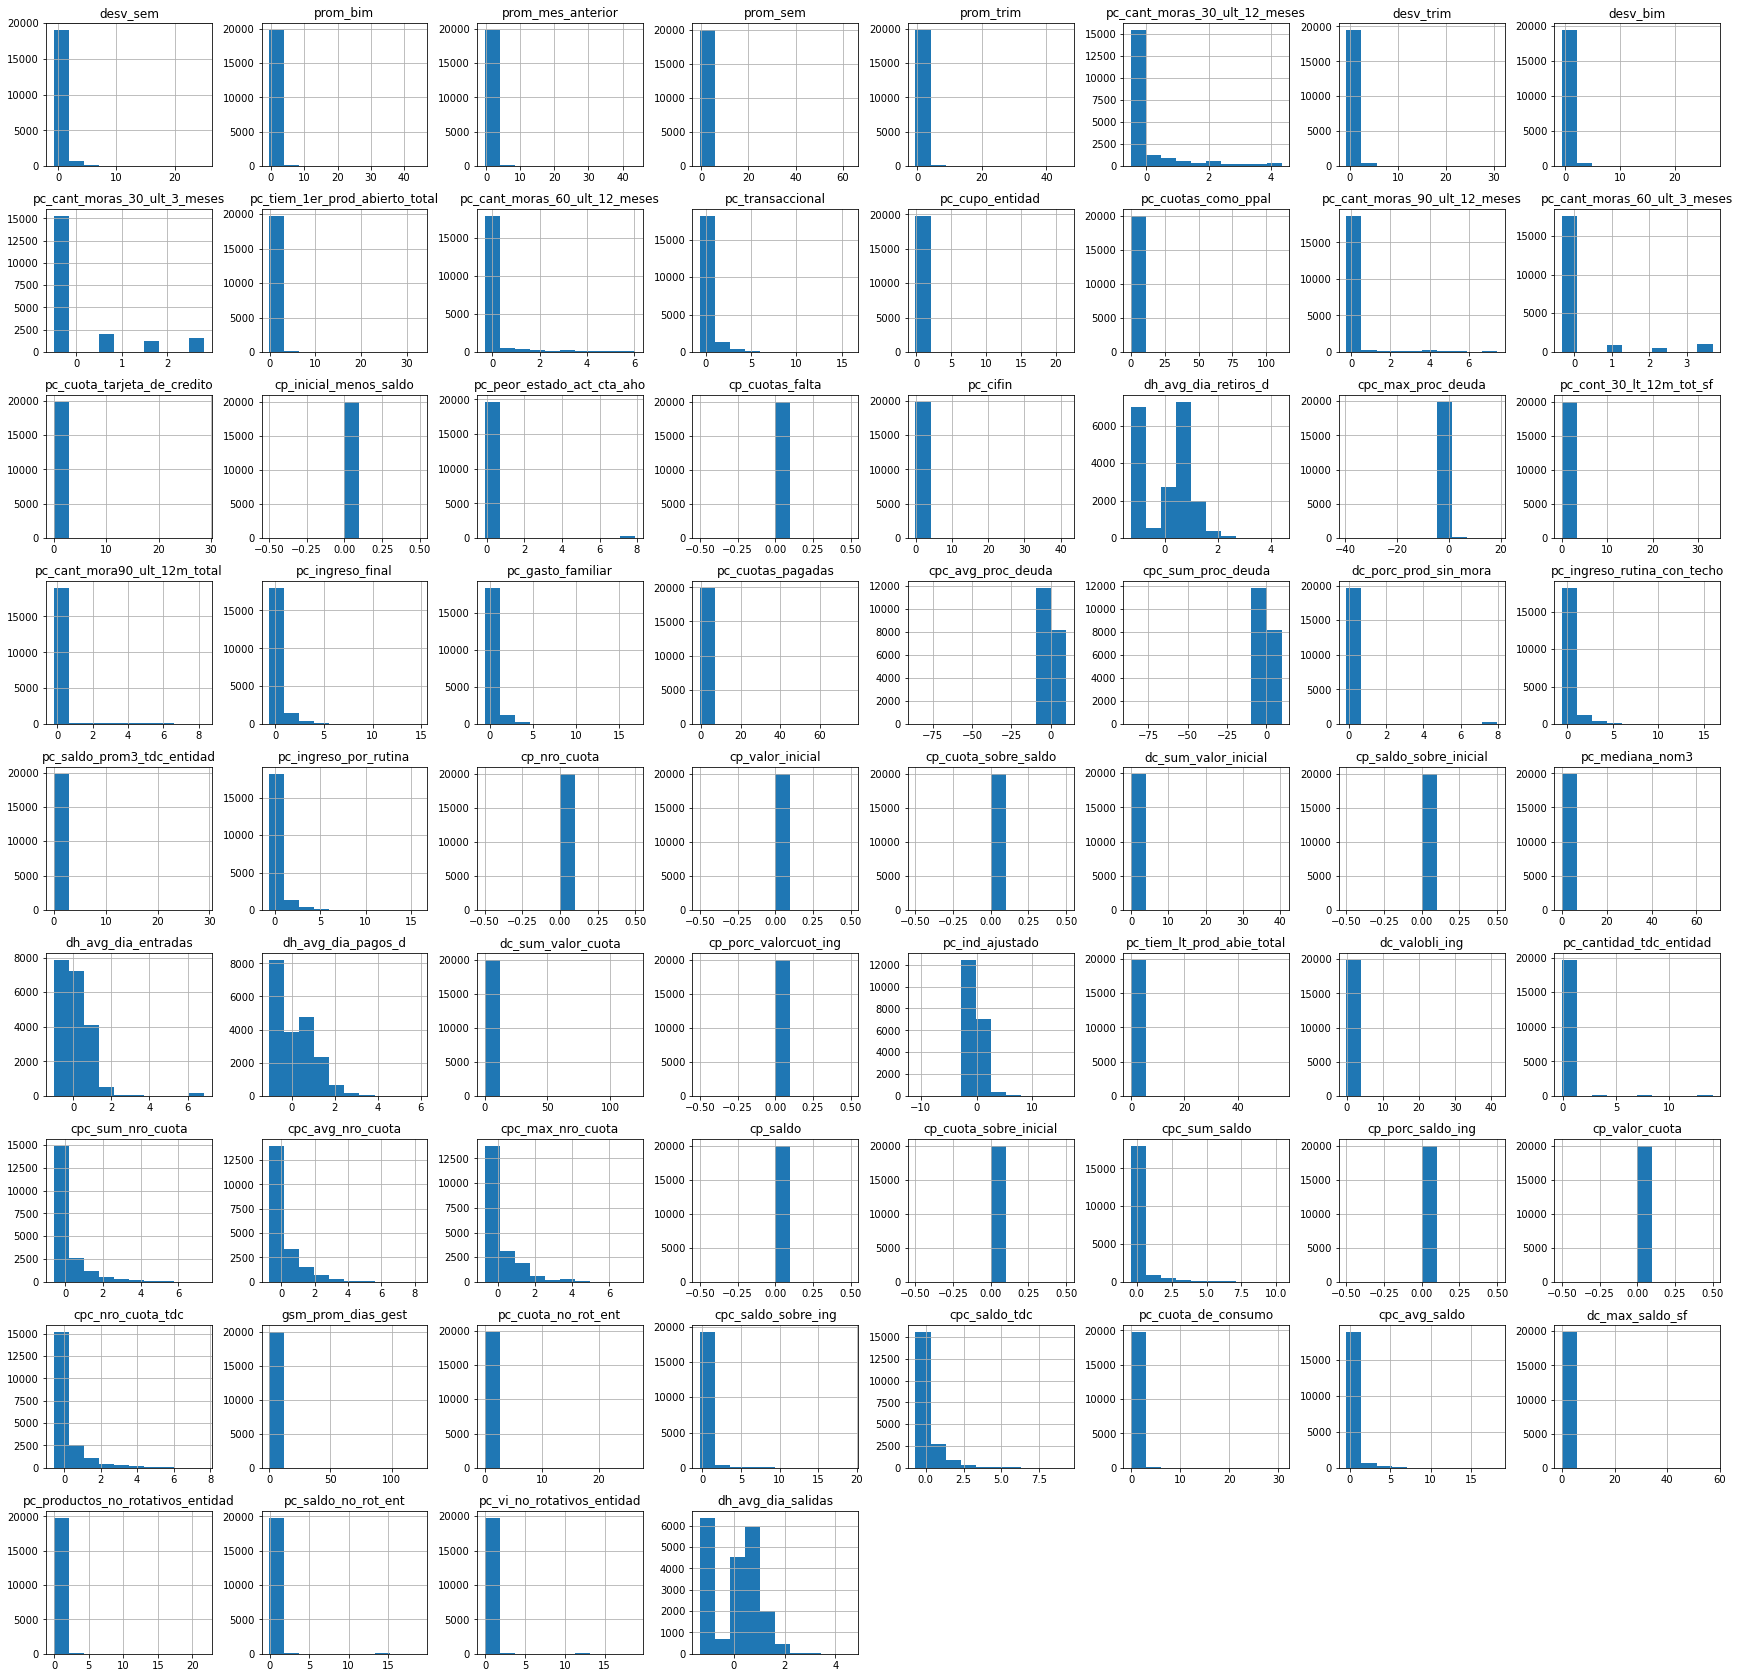

In [15]:
data[float_dt_in_data].hist(figsize=(30,30))

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Select upper triangle of correlation matrix
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

features = upper.loc[upper['y_auto_cura']>0.15]['y_auto_cura'].index
display(upper.loc[upper['y_auto_cura']>0.2]['y_auto_cura'])
print(upper.loc[upper['y_auto_cura']>0.1]['y_auto_cura'].index)

C:\Users\David\Anaconda3\envs\MLE\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


max_trim     0.234079
max_sem      0.234419
desv_sem     0.243318
prom_bim     0.207218
prom_sem     0.205150
max_bim      0.223322
prom_trim    0.213810
desv_trim    0.220012
Name: y_auto_cura, dtype: float64

Index(['max_trim', 'max_sem', 'desv_sem', 'prom_bim', 'max_mes_anterior',
       'prom_mes_anterior', 'prom_sem', 'max_bim', 'prom_trim',
       'pc_cant_moras_30_ult_12_meses', 'desv_trim', 'desv_bim',
       'pc_cant_moras_30_ult_3_meses', 'pc_cant_moras_60_ult_12_meses',
       'pc_cant_moras_90_ult_12_meses', 'pc_cant_moras_60_ult_3_meses'],
      dtype='object')


In [17]:
target = 'y_auto_cura'
ros = RandomOverSampler(random_state=1989)
X, y = ros.fit_resample(data[features], data[target])
scaler = StandardScaler().fit(X)
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1989)
model = LogisticRegression(max_iter=10000, random_state=0).fit(X_train, y_train)

In [29]:
pred_test = model.predict(X_test)
f1_test = model.score(X_test,y_test)
f1_test

0.6452917388792605

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test)
metrics.auc(fpr, tpr)

0.6452917388792605

In [21]:
weight = 6152/13848
print(weight)
better_model = LogisticRegression(penalty='elasticnet',solver='saga', l1_ratio=0.5, class_weight={0:weight,1:1-weight}, max_iter=10000, random_state=0).fit(X_train, y_train)

0.4442518775274408


In [22]:
better_pred_test = better_model.predict(X_test)
better_f1_test = f1_score(y_test, better_pred_test)
better_f1_test

0.6882763515911511

In [23]:
weight = 6152/13848
print(weight)
even_better_model = RandomForestClassifier(n_estimators=1000,random_state=0).fit(X_train, y_train)

0.4442518775274408


In [24]:
even_better_pred_test = even_better_model.predict(X_test)
even_better_f1_test = f1_score(y_test, even_better_pred_test)
even_better_f1_test

0.7723646723646723

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, even_better_pred_test)
metrics.auc(fpr, tpr)

0.769208549971115